# Hate Speech Detection - EDA

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(1234)

In [2]:
PATH = "."

df = pd.read_csv(PATH+"/data/labeled_data.csv", dtype={'tweet': 'string'}, ).drop('Unnamed: 0', axis=1)
classes = ['hate_speech', 'offensive_language', 'neither']

df['label'] = df[classes].idxmax(axis=1)


## Samples for each Class

In [3]:
for label, data in df.groupby('label'):
    print(label.upper())
    for _, sample in data.sample(5, random_state=1234).iterrows():
        print(f"- {sample.tweet}")
    print()

HATE_SPEECH
- RT @natal_mendoz: Whore slut cunt bitch nigga
- @young_moniee what&#39;s this chinks email? I&#39;m moving to China and slicing his throat
- @Buckm00se true sand niggers &amp;amp; bum Brits claim he&#39;s a ATG hall of fame legend smh
- @Alicia112794 So basically you like the background music, fag.
- It&#39;s a lot of Uncle Tom ass niggas out here.

NEITHER
- RT @KILLQuana: Hun, wrong social networking site RT&amp;#8220;@Schwaggy_Chulo: 666 - LMS for a good morning post, and something extra (maybe)&amp;#8221;
- RT @IcySoleOnline: Should of been a cork sole RT @Johnny_Blaz3: why is there no cork on the WTL XI?
- WALK OFF HR! @Yankees
- I&#39;m the biggest redskins dam right now if they get this stop
- My pits be stankin from doin dem flows. Is hard on a ol colored body in da heat. Dem white women be pushy when day want dare flows fixed

OFFENSIVE_LANGUAGE
- My nigga got me hanging out with his fat catfish bitch smh
- @gillbowski7 @MasiBlatnoy @DroBaby_ fuckkn hate when he 

## Class Distribution

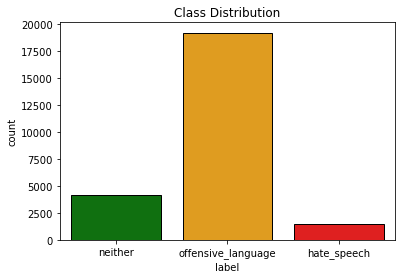

In [4]:
sns.countplot(df.label, ec='k', palette=['green', 'orange', 'red'])
plt.title('Class Distribution');
# plt.savefig('./res/classdist.png')

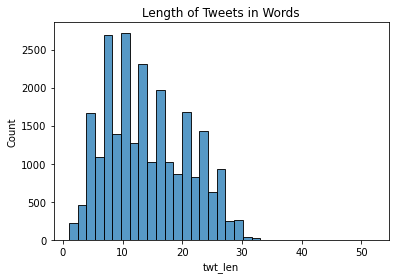

In [23]:
df['twt_len'] = df.tweet.apply(lambda txt: len(txt.split()))
sns.histplot(df.twt_len, bins=df.twt_len.nunique())
plt.title("Length of Tweets in Words");